# Fraud Detection using Random_Forest_Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('bs140513_032310.csv')
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [4]:
df.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [5]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='fraud', ylabel='count'>

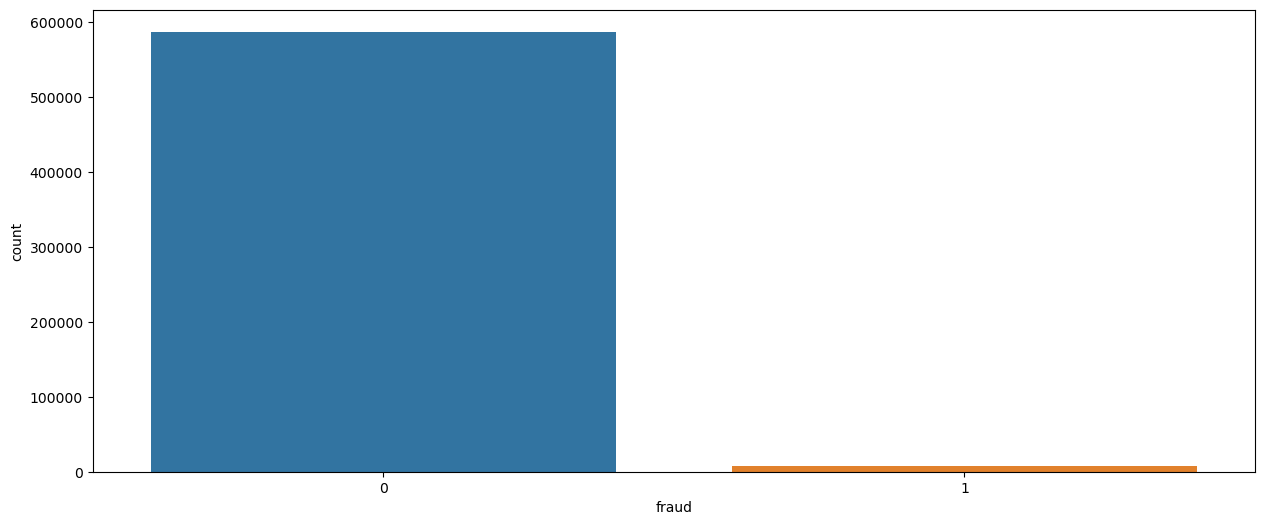

In [7]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='fraud')

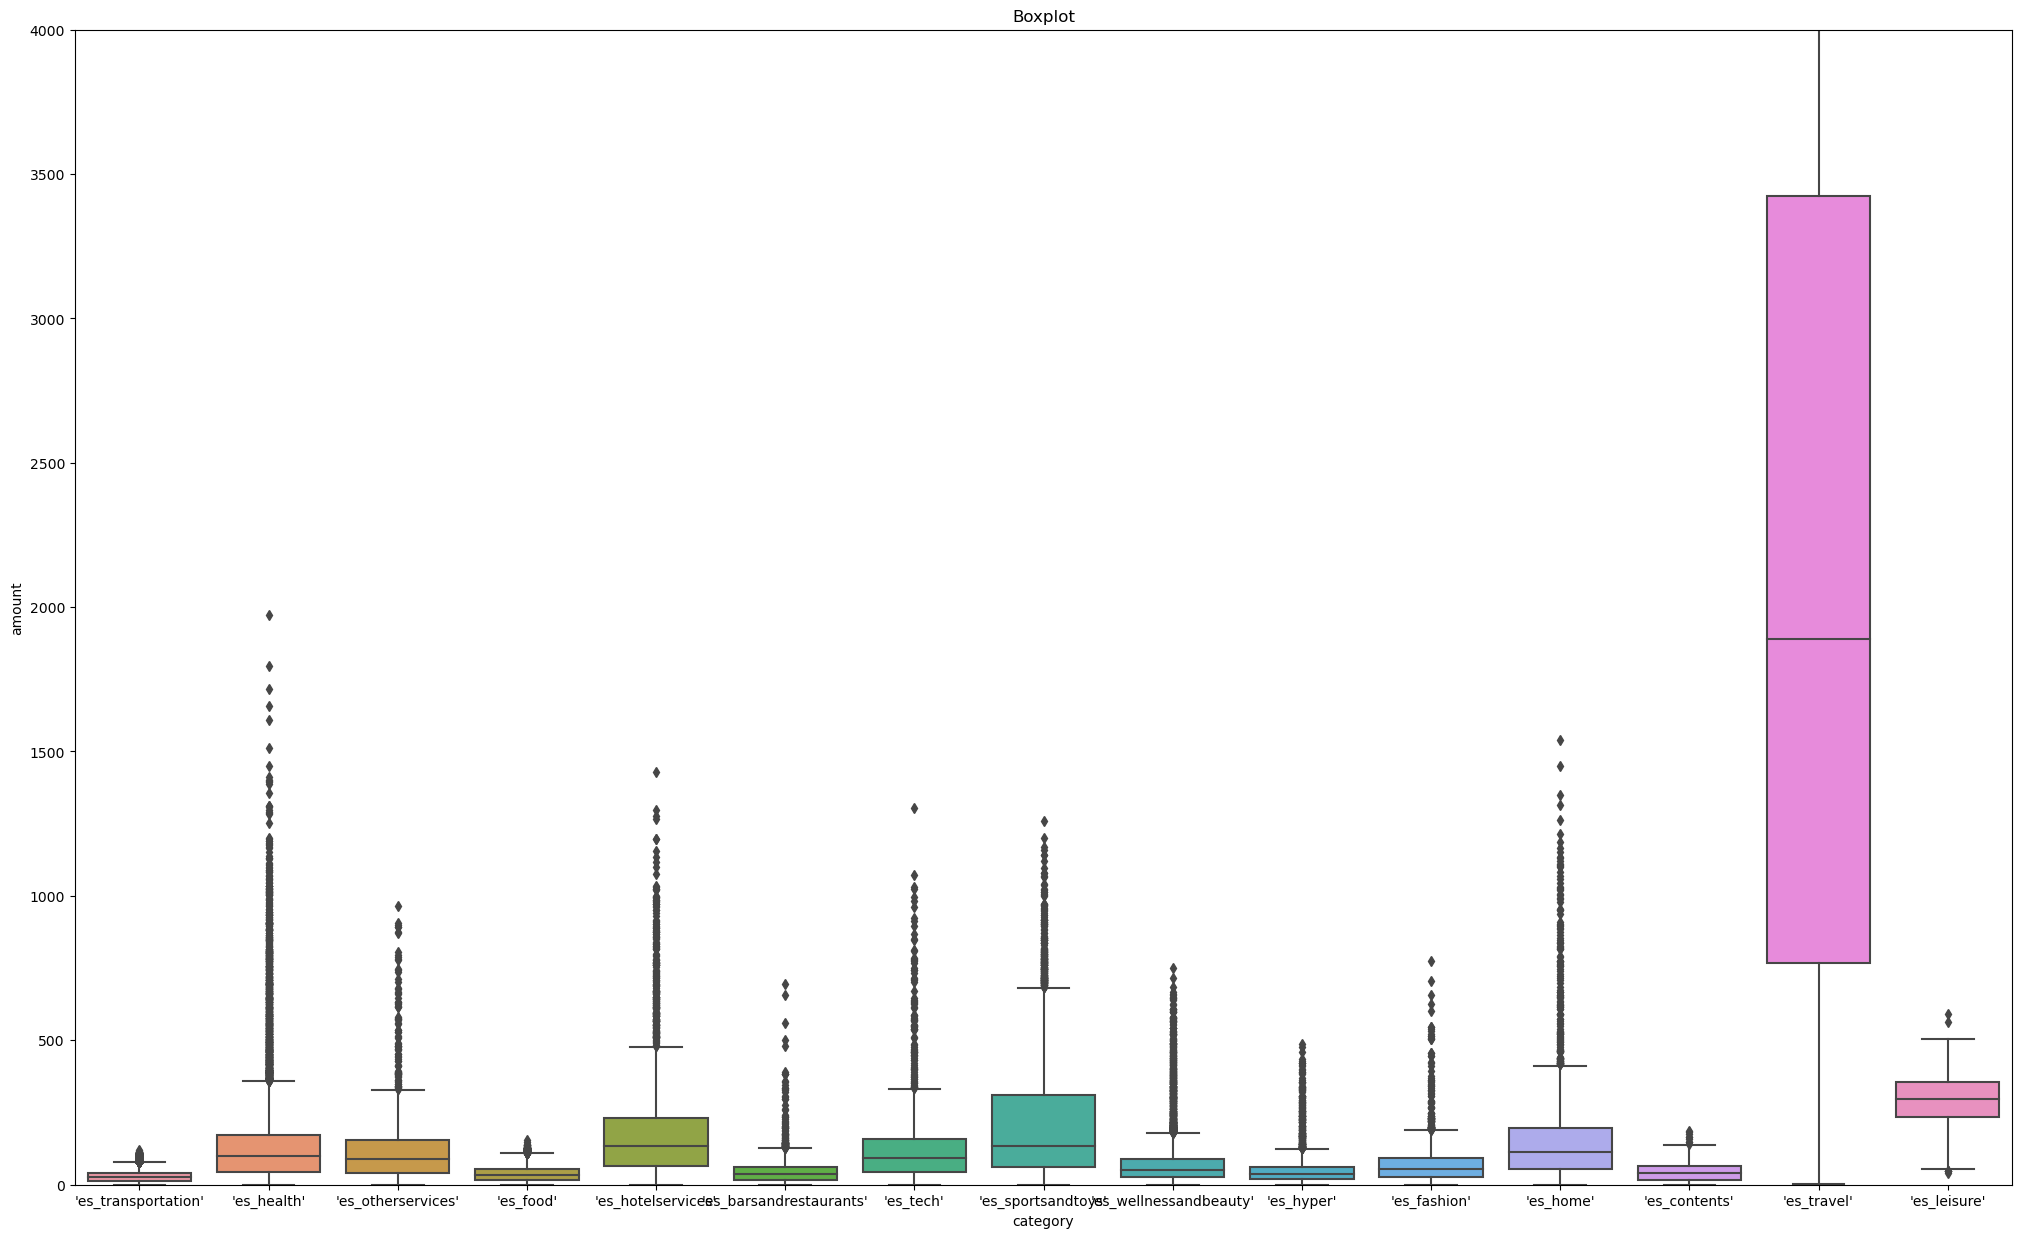

In [8]:
plt.figure(figsize=(25,15))
sns.boxplot(x=df.category,y=df.amount)
plt.title('Boxplot')
plt.ylim(0,4000)
plt.show()

In [9]:
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [10]:
df['zipMerchant'].nunique()

1

In [11]:
df['zipcodeOri'].nunique()

1

In [12]:
df=df.drop(columns=['zipcodeOri','zipMerchant'],axis=1)
df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','M1823072687','es_transportation',20.53,0
594639,179,'C650108285','4','F','M1823072687','es_transportation',50.73,0
594640,179,'C123623130','2','F','M349281107','es_fashion',22.44,0
594641,179,'C1499363341','5','M','M1823072687','es_transportation',14.46,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


In [14]:
col_category=df.select_dtypes(include=['object']).columns

In [15]:
for i in col_category:
    df[i]=df[i].astype('category')

In [20]:
df[col_category] = df[col_category].apply(lambda x: x.cat.codes)

In [21]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0
...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,18,12,20.53,0
594639,179,3369,4,1,18,12,50.73,0
594640,179,529,2,1,31,2,22.44,0
594641,179,1083,5,2,18,12,14.46,0


In [22]:
X=df.drop(columns=['fraud'])
y=df['fraud']

# Oversampling

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X, y)
y_resample.value_counts()

fraud
0    587443
1    587443
Name: count, dtype: int64

# Model Building

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier()

In [28]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
y_pred=model.predict(X_test)

In [31]:
y_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
acc=accuracy_score(y_test,y_pred)

In [33]:
acc

0.9953612547025812

In [34]:
classifcation=classification_report(y_test,y_pred)

In [37]:
print(classifcation)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    176080
           1       0.99      1.00      1.00    176386

    accuracy                           1.00    352466
   macro avg       1.00      1.00      1.00    352466
weighted avg       1.00      1.00      1.00    352466



In [38]:
confusion=confusion_matrix(y_test,y_pred)

In [40]:
confusion

array([[174771,   1309],
       [   326, 176060]], dtype=int64)